# Studying Sparse - Dense retrieval

This notebook studies **sparse - dense retrieval** using [trec-covid](https://ir.nist.gov/covidSubmit/index.html) dataset.

In [2]:
DATASET = 'trec-covid'

## 1. Vectorization

We use a own-built vectorizer class to parse docuements and queries and perform both sparse and dense vectorization.

In [1]:
from model import DocumentVectorizer

In [3]:
vectorizer = DocumentVectorizer(data_name=DATASET)

### 1.1 Parsing

Parsing documents and queries:

In [4]:
%%time
vectorizer.parse()

Parsing documents
Parsing queries
Wall time: 10.5 s


Document example:

In [5]:
vectorizer.documents[0].content

'OBJECTIVE: This retrospective chart review describes the epidemiology and clinical features of 40 patients with culture-proven Mycoplasma pneumoniae infections at King Abdulaziz University Hospital, Jeddah, Saudi Arabia. METHODS: Patients with positive M. pneumoniae cultures from respiratory specimens from January 1997 through December 1998 were identified through the Microbiology records. Charts of patients were reviewed. RESULTS: 40 patients were identified, 33 (82.5%) of whom required admission. Most infections (92.5%) were community-acquired. The infection affected all age groups but was most common in infants (32.5%) and pre-school children (22.5%). It occurred year-round but was most common in the fall (35%) and spring (30%). More than three-quarters of patients (77.5%) had comorbidities. Twenty-four isolates (60%) were associated with pneumonia, 14 (35%) with upper respiratory tract infections, and 2 (5%) with bronchiolitis. Cough (82.5%), fever (75%), and malaise (58.8%) were 

Query example:

In [6]:
vectorizer.queries[0].content

'coronavirus origin'

### 1.2 Tokenization

Performing tokenization:
- removing punctuation
- lowercase
- stop-words removal
- removing numerics and west asia chars
- stemming and lemming

In [7]:
%%time
vectorizer.tokenize()

Tokenizing documents
Tokenizing queries
Wall time: 6min 58s


Tokenized document example:

In [8]:
vectorizer.documents[0].tokenized_content

'object retrospect chart review describ epidemiolog clinic featur patient cultureproven mycoplasma pneumonia infect king abdulaziz univers hospit jeddah saudi arabia method patient posit pneumonia cultur respiratori specimen januari decemb identifi microbiolog record chart patient review result patient identifi requir admiss infect communityacquir infect affect age group common infant preschool child occur yearround common fall spring threequart patient comorbid twentyfour isol associ pneumonia upper respiratori tract infect bronchiol cough fever malais common symptom crepit wheez common sign patient pneumonia crepit bronchial breath immunocompromis patient like nonimmunocompromis patient present pneumonia versus p patient pneumonia unev recoveri recov follow complic die pneumonia infect die due under comorbid patient die pneumonia pneumonia comorbid conclus result similar publish data except find infect common infant preschool child mortal rate pneumonia patient comorbid high'

Query example:

In [9]:
vectorizer.queries[0].tokenized_content

'coronavirus origin'

### 1.3 Sparse vectorization

Sparse vectorization of documents and queries

In [10]:
%%time
vectorizer.sparse_vectorize()

Learning vocabulary idf 
Generating document sparse vector 
Generating query sparse vector 
Wall time: 21.1 s


In [11]:
vectorizer.sparse_document_vectors.shape

(171332, 203561)

In [12]:
vectorizer.sparse_query_vectors.shape

(50, 203561)

We have a total of **203561** different terms.

### 1.4 Dense vectorization

Dense vectorization of documents and queries:

In [13]:
%%time
vectorizer.dense_vectorize()

Generating document dense vector 
Generating query dense vector 
Wall time: 3h 23min 6s


In [14]:
vectorizer.dense_document_vectors.shape

(171332, 384)

In [15]:
vectorizer.dense_query_vectors.shape

(50, 384)

### 1. 5 Saving

We store vectors to disk in order to maintain vectors available without need to process them again

In [16]:
vectorizer.save()

## 2. Computing scores

We use a own-built vectorizer class compute **sparse scorse**, **dense scores** and **full scores** for each query.

We exploit results coming from previous computations

In [3]:
from model import ScoresComputation

In [4]:
%%time
scores = ScoresComputation(data_name=DATASET)

Wall time: 2.46 s


### 2.1 Computing sparse scores

Sparse scores:

In [5]:
scores.sparse_scores

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.01976995, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.02800341, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.01685203, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

Dense scores:

### 2.2 Computing dense scores

In [6]:
scores.dense_scores

array([[ 0.23035641,  0.05868525,  0.0808985 , ...,  0.11056654,
         0.4022637 ,  0.06336871],
       [ 0.14511135,  0.03200665,  0.03414595, ..., -0.00436217,
         0.335561  ,  0.05171427],
       [ 0.26708546,  0.15957084,  0.18775646, ...,  0.03295451,
         0.43381417,  0.11698195],
       ...,
       [ 0.24594153, -0.00112038,  0.01739945, ...,  0.03519394,
         0.4143529 ,  0.05736443],
       [ 0.27383426,  0.1491534 ,  0.16431344, ..., -0.09482913,
         0.48517653,  0.11431391],
       [ 0.2235369 ,  0.03000204,  0.13129233, ...,  0.02696273,
         0.3509785 ,  0.0884343 ]], dtype=float32)

### 2.3 Computing full scores

Full scores are actually the sum of the previous two results

In [7]:
scores.full_scores

array([[ 0.23035641,  0.05868525,  0.0808985 , ...,  0.11056654,
         0.4022637 ,  0.06336871],
       [ 0.14511135,  0.03200665,  0.0539159 , ..., -0.00436217,
         0.33556101,  0.05171427],
       [ 0.26708546,  0.15957084,  0.21575987, ...,  0.03295451,
         0.43381417,  0.11698195],
       ...,
       [ 0.24594153, -0.00112038,  0.01739945, ...,  0.03519394,
         0.41435289,  0.05736443],
       [ 0.27383426,  0.1491534 ,  0.18116546, ..., -0.09482913,
         0.48517653,  0.11431391],
       [ 0.22353689,  0.03000204,  0.13129233, ...,  0.02696273,
         0.35097849,  0.0884343 ]])

### 1.4 Saving

We store scores to disk:

In [8]:
scores.save()

## 3. Top-K analysis of recall

We use two own-built classes for recall evaluation and analysis

In [9]:
from model import RecallEvaluation, RecallAnalysis

### 3.1 Choise of K

Top-k is actually an hyperparameter of the model. We study a possible different behaviour varying the number of relevant documents we consider.

In [10]:
K = [3, 10, 50, 100, 500, 1000]

### 3.2 Evaluation

We study recall trend incrementing the value of **k'**, the number of documents with highest score considering sparse and dense scores alone. Iterations stop when 100% recall is reached.

We consider 90% recall enough: in the plot we also highlight k' value to reach at least 0.9 recall.

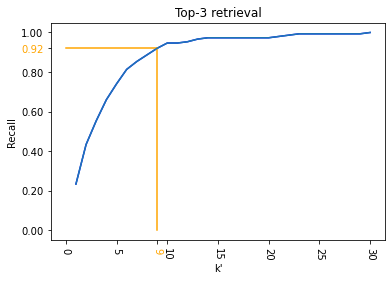

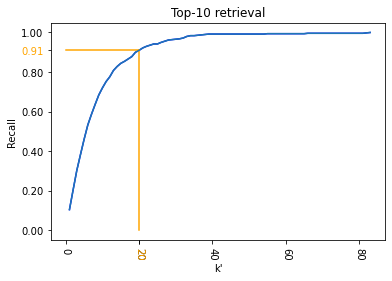

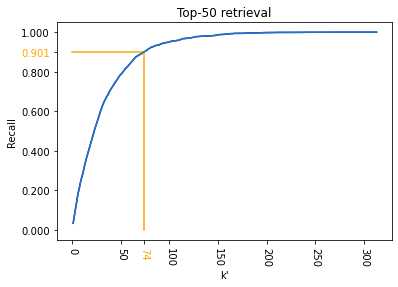

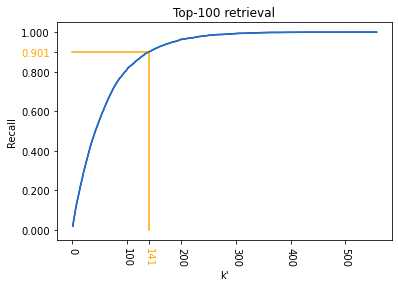

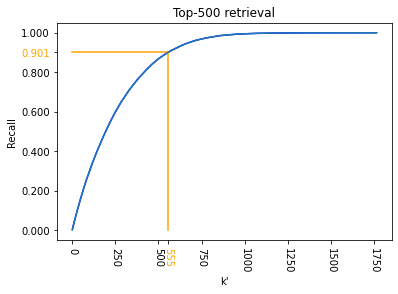

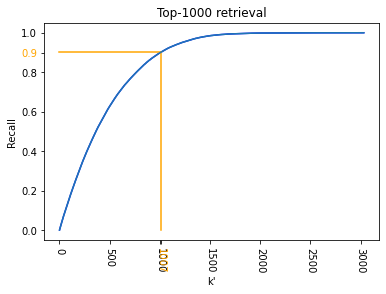

In [11]:
for k in K:
    rec_eval = RecallEvaluation(data_name=DATASET, k=k)
    rec_eval.evaluate()
    rec_eval.plot(save=True)
    rec_eval.save()

### 3.3 Studying interaction between k' and recall

We exploit previous results to study the interaction between **k'** and **recall** in different models (with fixed k)

In [12]:
ra = RecallAnalysis(data_name=DATASET)

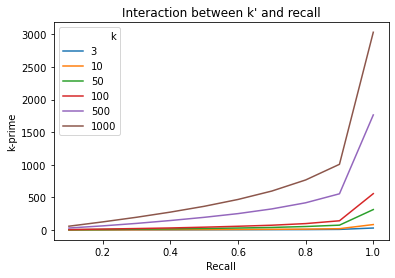

In [13]:
ra.plot(save=True)